In [26]:
import matplotlib.pyplot as plt
from binomial import Tree
import multiprocessing as mp
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

def get_error_from_depth(depth):
    return Tree(depth=depth, K=99, S0=100, r=0.06, sigma=0.2).root_option_diff()

def get_error_from_volatility(sigma):
    return Tree(depth=50, K=99, S0=100, r=0.06, sigma=sigma).root_option_diff()

In [2]:
pool = mp.Pool()
results = pool.map(get_error_from_depth, range(2, 50))
pool.close()

Text(0, 0.5, 'Absolute error')

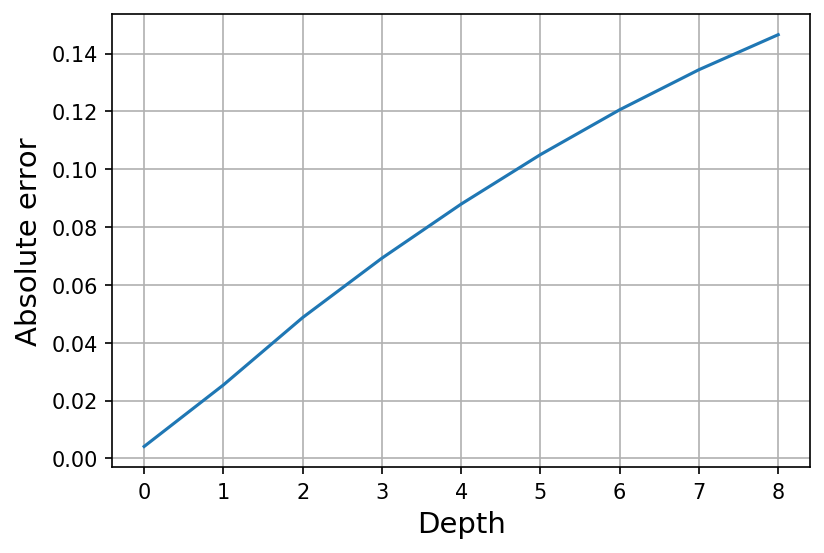

In [27]:
plt.plot(np.abs(results))
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Absolute error')

In [22]:
pool = mp.Pool()
results = pool.map(get_error_from_volatility, np.arange(0.1, 1, 0.1))
pool.close()

([<matplotlib.axis.XTick at 0x1a18917b38>,
 <a list of 9 Text xticklabel objects>)

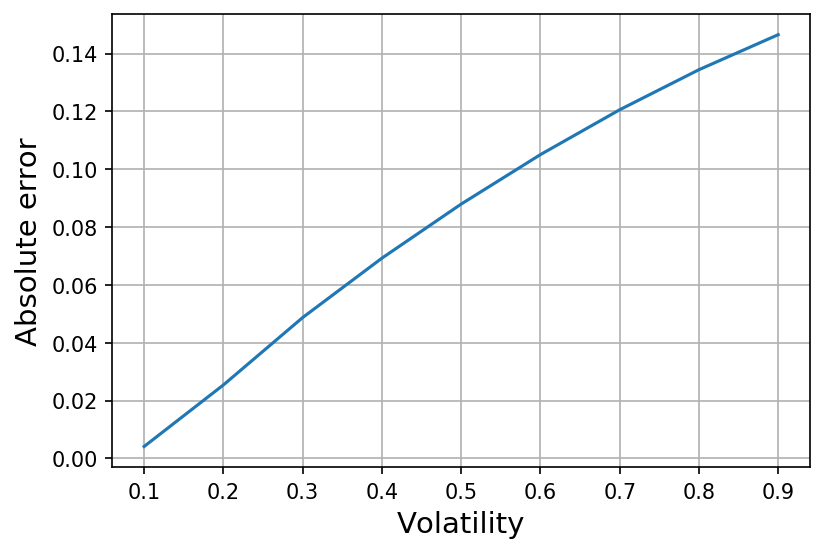

In [28]:
plt.plot(np.abs(results))
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Absolute error')
plt.xticks( range(len(results)), np.round(np.arange(0.1, 1, 0.1), 2))